## Résolution numérique de la cubique

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_14221/895974928.py:76: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))


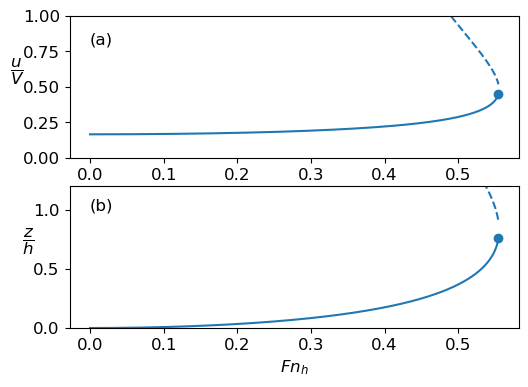

In [3]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import json
from config import large_figure_width, standard_figure_width

# Définition des constantes et paramètres de base
g = 9.81  # Accélération due à la gravité

# Dimensions du canal
W = 54  # Largeur totale
w = 54  # Largeur intérieure
T = 3   # Tirant d'eau
B = 11.4  # Maître-bau
h = 4.5  # Hauteur

# Calcul des surfaces et autres paramètres géométriques
Ac = h * W  # Surface de la section transversale
Ab = B * T  # Surface de la base
Hm = Ac / W  # Hauteur moyenne
m = Ab / Ac  # Rapport des surfaces
p = (W - w) / (2 * h)  # Pente

# Génération des valeurs de Froude
F_values = np.linspace(1e-6, 1, 1000)  # Valeurs de F de 0.01 à 1

# Initialisation des listes pour stocker les solutions u et z correspondantes
u1_values = []
z1_values = []
u2_values = []
z2_values = []

# Boucle sur les différentes valeurs de Froude
for F in F_values:
    # Calcul des coefficients du polynôme cubique
    a = F**2 / 2
    b = -(1 - m + F**2 / 2)
    
    # Résolution du polynôme cubique
    solutions = np.roots([a, 0, b, 1])
    
    # Filtrage des solutions réelles et positives
    solution_reels = np.real(solutions[np.imag(solutions) == 0])
    solution = solution_reels[solution_reels > 0]
    
    # Sélection de la solution minimale
    try:
        x1 = min(solution)
        x2 = max(solution)
    except:
        x1 = np.nan
        x2 = np.nan
    
    # Calcul de la vitesse u correspondante
    u1 = float((x1 - 1))
    u2 = float((x2 - 1))
    u1_values.append(u1)
    u2_values.append(u2)    
    
    # Calcul de la hauteur z correspondante
    
    z1 = float(h*F**2/2*( u1**2+ 2*u1 ))
    z2 = float(h*F**2 / 2 * (u2**2+ 2*u2))
    z1_values.append(z1)    
    z2_values.append(z2)

# Conversion des listes en tableaux numpy pour une manipulation plus facile
u1_values = np.array(u1_values)
z1_values = np.array(z1_values)
u2_values = np.array(u2_values)
z2_values = np.array(z2_values)

# Calcul des solutions analytiques avec les formules de cardan pour comparaison
q1 = 2 / F_values**2
p1 = -(1 + q1 * (1 - m))
y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
u = (y - 1)
z = h*F_values**2/2*( u**2+ 2*u )



max_z1 = np.nanmax(z1_values)
max_F = F_values[np.nanargmax(z1_values)]
max_u1 = np.nanmax(u1_values)



large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size)
ax1 = axes[1]
ax2 = axes[0]

# Tracé du premier graphique : rapport de hauteur
ax1.plot(F_values, z1_values, color = 'tab:blue')
ax1.plot(F_values, z2_values, '--', color = 'tab:blue')
ax1.plot(max_F, max_z1, 'o', color='tab:blue')
# ax1.plot(F_values, z, '--', color = 'orange')  # Ligne commentée pour la solution analytique
ax1.text( x=0, y = 1, s = '(b)' )
ax1.set_ylim(0, 1.2)
ax1.set_ylabel(r"$\dfrac{z}{h}$", rotation = 0)
ax1.set_xlabel(r'$Fn_h$')

# Tracé du deuxième graphique : rapport de vitesse
ax2.plot(F_values, u1_values, color = 'tab:blue')
ax2.plot(F_values, u2_values, '--', color = 'tab:blue')
ax2.plot(max_F, max_u1, 'o', color='tab:blue')
# ax2.plot(F_values, u, '--', color = 'orange')  # Ligne commentée pour la solution analytique
ax2.set_ylabel(r"$\dfrac{u}{V}$", rotation = 0)
ax2.set_ylim(0, 1.)
ax2.set_xlabel(r'$Fh_h$')
ax2.text( x=0, y = 0.8, s = '(a)' )
# Enregistrement de la figure en tant que fichier PDF
plt.savefig('../figures/cubique-kreitner.pdf', bbox_inches = 'tight')

# Affichage de la figure
plt.show()

## Avec les formules de Pompée

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/4211449416.py:26: RuntimeWarning: divide by zero encountered in divide
  q1 = 2/F**2
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/4211449416.py:28: RuntimeWarning: invalid value encountered in divide
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/4211449416.py:28: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )


0.1619046929805554


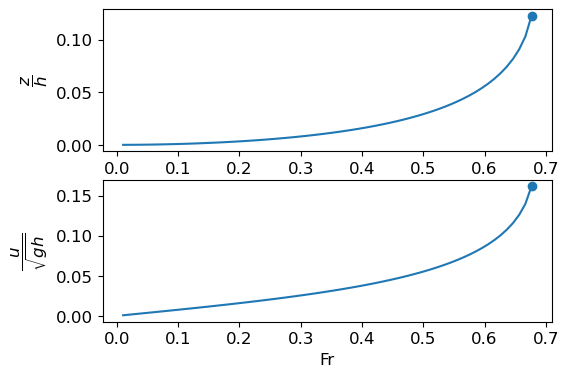

In [91]:
'''
SUBCRITIQUE
'''
import matplotlib.pyplot as plt
import numpy as np
import json
from config import large_figure_width, standard_figure_width

g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h



F = np.linspace(0, 1, 100)

q1 = 2/F**2
p1 = -( 1+q1*(1-m) )
y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )




u = F*(y-1)
z = 1 - m -1/y

print (max(u[~np.isnan(u)]))

large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axs = plt.subplots(2, 1, figsize=fig_size)


ax1.plot(F, z)
ax1.plot( max(F[~np.isnan(u)]), max(z[~np.isnan(u)]), 'o', color = 'tab:blue' )
ax1.set_ylabel(r"$\dfrac{z}{h}$")
ax1.set_xlabel('Fr')

# Tracer la deuxième figure sur le deuxième sous-graphique
ax2.plot(F, u)
ax2.plot( max(F[~np.isnan(u)]), max(u[~np.isnan(u)]), 'o', color = 'tab:blue' )
ax2.set_ylabel(r"$\dfrac{u}{\sqrt{gh}}$")
ax2.set_xlabel('Fr')

plt.savefig('../figures/cubique-kreitner.pdf', bbox_inches = 'tight')





plt.show()

## On compare résolution de la cubique avec les formules de Cardan

### Avec les cosinus

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2825733729.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  p = -(1 + 2*(1-m)/F**2)
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2825733729.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  q = 2/F**2
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2825733729.py:12: RuntimeWarning: invalid value encountered in scalar divide
  common_term = (3 * q) / (2 * p) * math.sqrt(3 / -p)


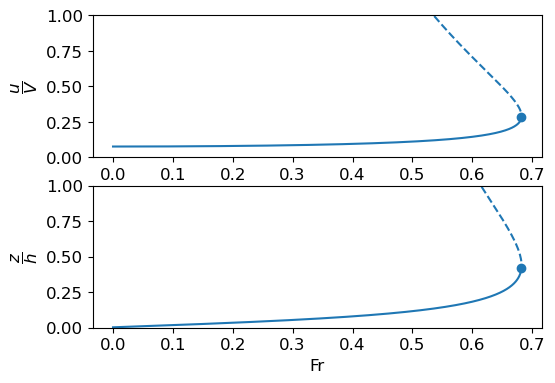

In [185]:
import math
import numpy as np
import matplotlib.pyplot as plt
from config import large_figure_width, standard_figure_width

def calculate_z(p, q):
    # Ensure that p is negative for the square root to be valid
    if p >= 0:
        raise ValueError("Input p must be negative")

    # Calculate the common term
    common_term = (3 * q) / (2 * p) * math.sqrt(3 / -p)
    
    # Ensure the input to arccos is within the range [-1, 1]
    if common_term < -1 or common_term > 1:
        raise ValueError("Input to arccos out of range. Check the values of p and q.")

    arccos_val = math.acos(common_term)
    sqrt_term = 2 * math.sqrt(-p / 3)
    
    z = []
    for k in (-1, 0, 1):
        zk = sqrt_term * math.cos((arccos_val / 3) + (2 * k * math.pi / 3))
        z.append(zk)
    
    return z


g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
z = np.linspace(0, 2, 100)
z = z / Hm
F_values = np.linspace(0.0, 1, 2000)  # Using 0.01 to avoid division by zero

# Lists to store solutions
u_1 = []
u_2 = []
u_3 = []

for F in F_values:
    try:
        p = -(1 + 2*(1-m)/F**2)
        q = 2/F**2
        roots = calculate_z(p, q)
        u_1.append((roots[0]-1))
        u_2.append((roots[1]-1))
        u_3.append((roots[2]-1))
    except ValueError as e:
        # Handle cases where calculation is not possible
        u_1.append(float('nan'))
        u_2.append(float('nan'))
        u_3.append(float('nan'))

        



z_1 = np.array(u_1)**2/2 + 2*np.array(u_1)* F_values
z_2 = np.array(u_2)**2/2 + 2*np.array(u_2)* F_values


max_z1 = np.nanmax(z_1)
max_F = F_values[np.nanargmax(z_1)]
max_u1 = np.nanmax(u_1)


large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size)
ax1 = axes[1]
ax2 = axes[0]


ax1.plot(F_values, z_1, color = 'tab:blue')
ax1.plot(F_values, z_2, '--', color = 'tab:blue')
ax1.plot(max_F, max_z1, 'o', color='tab:blue')
ax1.set_ylabel(r"$\dfrac{z}{h}$")
ax1.set_xlabel('Fr')
ax1.set_ylim(0, 1)
# Tracer la deuxième figure sur le deuxième sous-graphique
ax2.plot(F_values, u_1, color = 'tab:blue')
ax2.plot(F_values, u_2, '--', color = 'tab:blue')
ax2.plot(max_F, max_u1, 'o', color='tab:blue')
ax2.set_ylabel(r"$\dfrac{u}{V}$")
ax2.set_xlabel('Fr')
ax2.set_ylim(0, 1)
plt.savefig('../figures/cubique-kreitner.pdf', bbox_inches = 'tight')



plt.show()


## On utilise la formule de Constantine


/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2692184109.py:24: RuntimeWarning: invalid value encountered in divide
  uc = -1 + np.sqrt( 1 + 2*z/Fc**2 )
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2692184109.py:36: RuntimeWarning: divide by zero encountered in divide
  q1 = 2 / F_values**2
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2692184109.py:38: RuntimeWarning: invalid value encountered in divide
  y1 = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2692184109.py:38: RuntimeWarning: invalid value encountered in arcsin
  y1 = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))


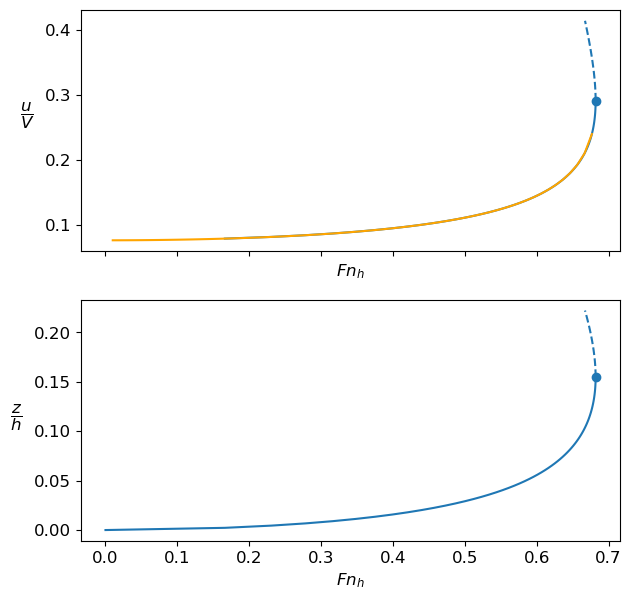

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import json
from config import large_figure_width, standard_figure_width

g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h * W
Ab = B * T
Hm = Ac / W
m = Ab / Ac

z = np.linspace(0, 1, 100)
z = z / Hm



Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) ) # constantine
uc = -1 + np.sqrt( 1 + 2*z/Fc**2 )




max_index = np.argmax(Fc)
Fc_max = Fc[max_index]
zc_max = z[max_index]
uc_max = uc[max_index]


F_values = np.linspace(0, 1, 100)
q1 = 2 / F_values**2
p1 = -(1 + q1 * (1 - m))
y1 = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
u1 = (y1 - 1)
z1 = 1 - m - 1 / y1


fig_size = (1.2*large_figure_width, 1.7*large_figure_height)
fig, axes = plt.subplots(2, 1, figsize=fig_size, sharex=True)


ax1 = axes[1]


ax1.plot(Fc[:max_index + 1], z[:max_index + 1], color='tab:blue')
ax1.plot(Fc_max, zc_max, 'o', color='tab:blue')
ax1.plot( Fc[max_index:], z[max_index:], '--',color = 'tab:blue' )

ax1.set_xlabel(r'$Fn_{h}$', rotation=0)
ax1.set_ylabel(r'$\dfrac{z}{h}$', rotation=0)


ax2 = axes[0]



ax2.plot(Fc[:max_index + 1], uc[:max_index + 1], color='tab:blue')
ax2.plot(Fc_max, uc_max, 'o', color='tab:blue')
ax2.plot( Fc[max_index:], uc[max_index:], '--',color = 'tab:blue' )

ax2.plot( F_values, u1, color = 'orange' )
ax2.set_xlabel(r'$Fn_{h}$')
ax2.set_ylabel(r'$\dfrac{u}{V}$', rotation=0)



ax1.yaxis.set_label_coords(-0.12, 0.45)
ax2.yaxis.set_label_coords(-0.1, 0.5)

# ax2.text( x=0, y = 0.8, s = '(a)' )
# ax1.text( x=0, y = 0.37, s = '(b)' )

plt.savefig('../figures/Constantine.pdf', bbox_inches='tight')
plt.show()


## On extrait les valeurs critiques pour toutes les valeurs de m

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/3295552271.py:33: RuntimeWarning: divide by zero encountered in divide
  q1 = 2/F**2
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/3295552271.py:35: RuntimeWarning: invalid value encountered in divide
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/3295552271.py:35: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )


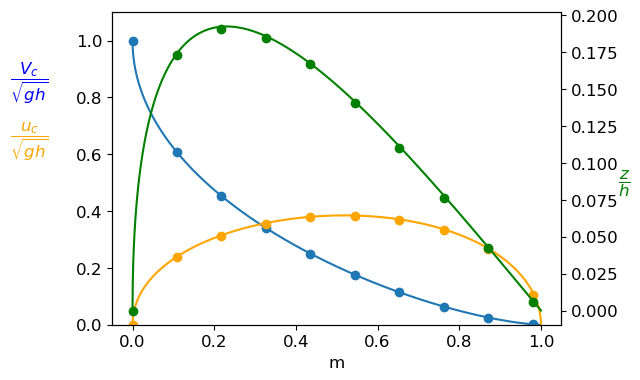

In [213]:
'''
SUBCRITIQUE
'''
import matplotlib.pyplot as plt
import numpy as np
import json
from config import large_figure_width, standard_figure_width

g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h

m_values = np.linspace(0, 0.98, 10)
linearm_values = np.linspace( 0, 1, 2000 )
zc_values = []
uc_values = []
Fc_values = []

for m in m_values :
    

    F = np.linspace(0, 1, 100000)

    q1 = 2/F**2
    p1 = -( 1+q1*(1-m) )
    y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )


    u = F*(y-1)
    z = 1 - m -1/y
    
    
    zc = max(z[~np.isnan(u)])
    Fc = max(F[~np.isnan(u)])
    uc = max(u[~np.isnan(u)])
    
    
    zc_values += [zc]
    uc_values += [uc]
    Fc_values += [Fc]
    
    
Fs = ( 2*np.sin(np.arcsin(1-linearm_values)/3) )**1.5
z = 1/2*( Fs**(2/3) - Fs**2 )
u = Fs**(1/3) - Fs

large_figure_height = 0.7 * large_figure_width
fig_size = (large_figure_width, large_figure_height)

fig, ax = plt.subplots(figsize=fig_size)
# plt.figure(figsize=fig_size)
ax2 = ax.twinx()
ax3 = ax
ax.plot( linearm_values, Fs, label = r'Fr$_c$', color = 'tab:blue' )
ax.plot( m_values, Fc_values, 'o', color = 'tab:blue' )

ax.plot( linearm_values, u, label = r"$\dfrac{u}{\sqrt{gh}}$", color = 'orange' )
ax.plot( m_values, uc_values, 'o', color = 'orange' )

ax2.plot( linearm_values, z, label = r'$\dfrac{z}{h}$', color = 'green' )
ax2.plot( m_values, zc_values, 'o', color = 'green' )




ax.set_xlabel( r'm' )
ax.text( x = -0.3, y = 0.85, s =r'$\dfrac{V_c}{\sqrt{gh}}$', color = 'blue' )
ax3.text(x = -0.3, y = 0.65, s =r'$\dfrac{u_c}{\sqrt{gh}}$', color = 'orange' )
ax2.set_ylabel( r'$\dfrac{z}{h}$', rotation = 0, color ='green')

ax.set_ylim( 0, 1.1 )

# plt.legend()
plt.savefig('../Figures/Schjif.pdf', bbox_inches = 'tight')
plt.show()


/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/589892685.py:33: RuntimeWarning: divide by zero encountered in divide
  q1 = 2/F**2
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/589892685.py:35: RuntimeWarning: invalid value encountered in divide
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/589892685.py:35: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )


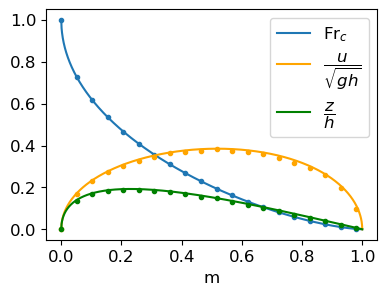

In [34]:
'''
SUBCRITIQUE
'''
import matplotlib.pyplot as plt
import numpy as np
import json
from config import large_figure_width, standard_figure_width

g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h

m_values = np.linspace(0, 0.98, 20)
linearm_values = np.linspace( 0, 1, 2000 )
zc_values = []
uc_values = []
Fc_values = []

for m in m_values :
    

    F = np.linspace(0, 1, 10000)

    q1 = 2/F**2
    p1 = -( 1+q1*(1-m) )
    y = np.sqrt( -4*p1/3 )*np.sin( 1/3*np.arcsin( np.sqrt( -27/4*q1**2/p1**3 ) ) )




    u = F*(y-1)
    z = 1 - m -1/y
    
    
    zc = max(z[~np.isnan(u)])
    Fc = max(F[~np.isnan(u)])
    uc = max(u[~np.isnan(u)])
    
    
    zc_values += [zc]
    uc_values += [uc]
    Fc_values += [Fc]
    
    
Fs = ( 2*np.sin(np.arcsin(1-linearm_values)/3) )**1.5
z = 1/2*( Fs**(2/3) - Fs**2 )
u = Fs**(1/3) - Fs

standard_figure_height = 0.7 * standard_figure_width
fig_size = (standard_figure_width, standard_figure_height)

fig, ax = plt.subplots(figsize=fig_size)
# plt.figure(figsize=fig_size)

ax.plot( linearm_values, Fs, label = r'Fr$_c$', color = 'tab:blue' )
ax.plot( m_values, Fc_values, '.', color = 'tab:blue' )

ax.plot( linearm_values, u, label = r"$\dfrac{u}{\sqrt{gh}}$", color = 'orange' )
ax.plot( m_values, uc_values, '.', color = 'orange' )

ax.plot( linearm_values, z, label = r'$\dfrac{z}{h}$', color = 'green' )
ax.plot( m_values, zc_values, '.', color = 'green' )




ax.set_xlabel( r'm' )
ax.legend()
plt.show()


/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_34585/2859163826.py:73: RuntimeWarning: invalid value encountered in arcsin
  y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))


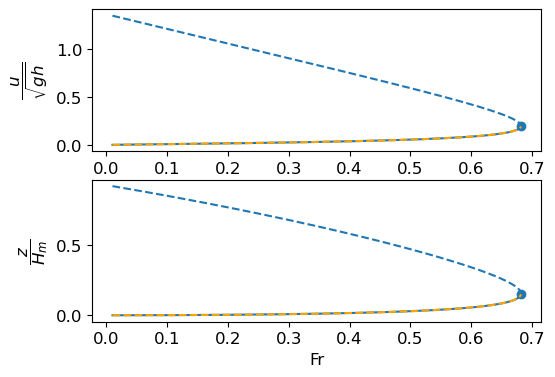

In [192]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import json

# Définition des constantes et paramètres de base
g = 9.81  # Accélération due à la gravité

# Dimensions du canal
W = 54  # Largeur totale
w = 54  # Largeur intérieure
T = 3   # Epaisseur
B = 5.7  # Largeur de base
h = 4.5  # Hauteur

# Calcul des surfaces et autres paramètres géométriques
Ac = h * W  # Surface de la section transversale
Ab = B * T  # Surface de la base
Hm = Ac / W  # Hauteur moyenne
m = Ab / Ac  # Rapport des surfaces
p = (W - w) / (2 * h)  # Pente

# Génération des valeurs de Froude
F_values = np.linspace(0.01, 1, 1000)  # Valeurs de F de 0.01 à 1

# Initialisation des listes pour stocker les solutions u et z correspondantes
u1_values = []
z1_values = []
u2_values = []
z2_values = []

# Boucle sur les différentes valeurs de Froude
for F in F_values:
    # Calcul des coefficients du polynôme cubique
    a = F**2 / 2
    b = -(1 - m + F**2 / 2)
    
    # Résolution du polynôme cubique
    solutions = np.roots([a, 0, b, 1])
    
    # Filtrage des solutions réelles et positives
    solution_reels = np.real(solutions[np.imag(solutions) == 0])
    solution = solution_reels[solution_reels > 0]
    
    # Sélection de la solution minimale
    try:
        x1 = min(solution)
        x2 = max(solution)
    except:
        x1 = np.nan
        x2 = np.nan
    
    # Calcul de la vitesse u correspondante
    u1 = float(F * (x1 - 1))
    u2 = float(F * (x2 - 1))
    u1_values.append(u1)
    u2_values.append(u2)    
    # Calcul de la hauteur z correspondante
    z1 = float(F**2 / 2 * (x1**2 - 1))
    z2 = float(F**2 / 2 * (x2**2 - 1))
    z1_values.append(z1)    
    z2_values.append(z2)

# Conversion des listes en tableaux numpy pour une manipulation plus facile
u1_values = np.array(u1_values)
z1_values = np.array(z1_values)
u2_values = np.array(u2_values)
z2_values = np.array(z2_values)

# Calcul des solutions analytiques avec les formules de cardan pour comparaison
q1 = 2 / F_values**2
p1 = -(1 + q1 * (1 - m))
y = np.sqrt(-4 * p1 / 3) * np.sin(1 / 3 * np.arcsin(np.sqrt(-27 / 4 * q1**2 / p1**3)))
u = F_values * (y - 1)
z = 1 - m - 1 / y



max_z1 = np.nanmax(z1_values)
max_F = F_values[np.nanargmax(z1_values)]
max_u1 = np.nanmax(u1_values)



# Créer une grille de sous-graphiques avec une rangée et deux colonnes
fig, axes = plt.subplots(2, 1, figsize=fig_size)
ax1 = axes[1]
ax2 = axes[0]

# Tracé du premier graphique : rapport de hauteur
ax1.plot(F_values, z1_values, color = 'tab:blue')
ax1.plot(F_values, z2_values, '--', color = 'tab:blue')
ax1.plot(max_F, max_z1, 'o', color='tab:blue')
ax1.plot(F_values, z, '--', color = 'orange')  # Ligne commentée pour la solution analytique

ax1.set_ylabel(r"$\dfrac{z}{H_m}$")
ax1.set_xlabel('Fr')

# Tracé du deuxième graphique : rapport de vitesse
ax2.plot(F_values, u1_values, color = 'tab:blue')
ax2.plot(F_values, u2_values, '--', color = 'tab:blue')
ax2.plot(max_F, max_u1, 'o', color='tab:blue')
ax2.plot(F_values, u, '--', color = 'orange')  # Ligne commentée pour la solution analytique
ax2.set_ylabel(r"$\dfrac{u}{\sqrt{gh}}$")
ax2.set_xlabel('Fr')

# Enregistrement de la figure en tant que fichier PDF
plt.savefig('../figures/cubique-kreitner_resolution-numerique.pdf', bbox_inches='tight')

# Affichage de la figure
plt.show()